# We perform Exploratory Data Analysis by Genre

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chartify
from bokeh.models import HoverTool

## Creating the usable dataframe

I *think* we want to get rid of duplicate songs by their ID. Remember some songs have the same name but a different ID and different audio features.

In [2]:
df = pd.read_csv('../../Data/final_with_duplicates.csv')
df.drop(columns = ['Unnamed: 0', 'playlist_id', 'playlist_name'], inplace = True)
df.drop(columns = ['type'], inplace = True)

#removing the one track_name NA
df = df[pd.notnull(df['track_name'])]
#removing the one artist NA
df = df[pd.notnull(df['artist'])]

df.head()

track_ids  track_pop                   track_name  \
0  3GJ4hzg4lrGwU51Y3VARbF         78                   Speechless   
1  2rxQMGVafnNaRaXlRMWPde         79              Beautiful Crazy   
2  7Lr4XaxGpkAwa37IVgg22k         69                 Back To Life   
3  5kp3JbZL1ROMxc32pcpn29         58  Slow Dance In A Parking Lot   
4  1wPiUPw9IqSchKwinw7dCf         10                 Made For You   

          artist              artist_ids  featured_artist  danceability  \
0     Dan + Shay  7z5WFjZAIYejWy0NI5lv4T                0         0.616   
1     Luke Combs  718COspgdWOnwOFpJHRZHS                0         0.552   
2  Rascal Flatts  0a1gHP0HAqALbEyxaD5Ngn                0         0.467   
3   Jordan Davis  77kULmXAQ6vWer7IIHdGzI                0         0.519   
4      Jake Owen  1n2pb9Tsfe4SwAjmUac6YT                0         0.541   

   energy  key  loudness  ...  acousticness  instrumentalness  liveness  \
0   0.438    1    -5.968  ...         0.356          0.000000    0.2400   
1   0.402   11    -7.431  ...         0.676          0.000000    0.0928   
2   0.701    4    -4.997  ...         0.191          0.000000    0.0769   
3   0.833    7    -4.470  ...         0.303          0.000001    0.1690   
4   0.452    1    -6.129  ...         0.762          0.000020    0.1140   

   valence    tempo  duration_ms  time_signature  artist_pop  \
0    0.386  135.929       213387               4          85   
1    0.382  103.313       193200               4          86   
2    0.280  132.041       214219               3          76   
3    0.514   81.992       193929               4          72   
4    0.325   82.052       238040               4          72   

                  genre  category  
0  contemporary country   country  
1  contemporary country   country  
2  contemporary country   country  
3  contemporary country   country  
4  contemporary country   country  

[5 rows x 22 columns]

In [3]:
# This should drop all of the repeated songs..cutting down our dataframe by a large number
df.drop_duplicates(inplace = True)

We had 16,864 songs over all the playlists but now we only have 13,716 songs. 

In [4]:
df.shape

(13716, 22)

In [5]:
# This number should match the 0 element in our df_eda shape
# It doesn't match because some songs might appear in more than one category...should be fixed if I get rid
# of category
len(df['track_ids'].unique())

12527

In [6]:
df.reset_index(inplace = True)

In [7]:
#note this way will revert to prob country bc it'll take where the song first appears
# second version we could shuffle the dataset

temp = df['track_ids'].drop_duplicates().index

In [8]:
df = df.iloc[temp,:]

In [9]:
df.head()

index               track_ids  track_pop                   track_name  \
0      0  3GJ4hzg4lrGwU51Y3VARbF         78                   Speechless   
1      1  2rxQMGVafnNaRaXlRMWPde         79              Beautiful Crazy   
2      2  7Lr4XaxGpkAwa37IVgg22k         69                 Back To Life   
3      3  5kp3JbZL1ROMxc32pcpn29         58  Slow Dance In A Parking Lot   
4      4  1wPiUPw9IqSchKwinw7dCf         10                 Made For You   

          artist              artist_ids  featured_artist  danceability  \
0     Dan + Shay  7z5WFjZAIYejWy0NI5lv4T                0         0.616   
1     Luke Combs  718COspgdWOnwOFpJHRZHS                0         0.552   
2  Rascal Flatts  0a1gHP0HAqALbEyxaD5Ngn                0         0.467   
3   Jordan Davis  77kULmXAQ6vWer7IIHdGzI                0         0.519   
4      Jake Owen  1n2pb9Tsfe4SwAjmUac6YT                0         0.541   

   energy  key  ...  acousticness  instrumentalness  liveness  valence  \
0   0.438    1  ...         0.356          0.000000    0.2400    0.386   
1   0.402   11  ...         0.676          0.000000    0.0928    0.382   
2   0.701    4  ...         0.191          0.000000    0.0769    0.280   
3   0.833    7  ...         0.303          0.000001    0.1690    0.514   
4   0.452    1  ...         0.762          0.000020    0.1140    0.325   

     tempo  duration_ms  time_signature  artist_pop                 genre  \
0  135.929       213387               4          85  contemporary country   
1  103.313       193200               4          86  contemporary country   
2  132.041       214219               3          76  contemporary country   
3   81.992       193929               4          72  contemporary country   
4   82.052       238040               4          72  contemporary country   

   category  
0   country  
1   country  
2   country  
3   country  
4   country  

[5 rows x 23 columns]

In [10]:
df.shape

(12527, 23)

In [11]:
df.to_csv('../../Data/final_without_duplicates.csv', index = False)

In [12]:
df.head()

index               track_ids  track_pop                   track_name  \
0      0  3GJ4hzg4lrGwU51Y3VARbF         78                   Speechless   
1      1  2rxQMGVafnNaRaXlRMWPde         79              Beautiful Crazy   
2      2  7Lr4XaxGpkAwa37IVgg22k         69                 Back To Life   
3      3  5kp3JbZL1ROMxc32pcpn29         58  Slow Dance In A Parking Lot   
4      4  1wPiUPw9IqSchKwinw7dCf         10                 Made For You   

          artist              artist_ids  featured_artist  danceability  \
0     Dan + Shay  7z5WFjZAIYejWy0NI5lv4T                0         0.616   
1     Luke Combs  718COspgdWOnwOFpJHRZHS                0         0.552   
2  Rascal Flatts  0a1gHP0HAqALbEyxaD5Ngn                0         0.467   
3   Jordan Davis  77kULmXAQ6vWer7IIHdGzI                0         0.519   
4      Jake Owen  1n2pb9Tsfe4SwAjmUac6YT                0         0.541   

   energy  key  ...  acousticness  instrumentalness  liveness  valence  \
0   0.438    1  ...         0.356          0.000000    0.2400    0.386   
1   0.402   11  ...         0.676          0.000000    0.0928    0.382   
2   0.701    4  ...         0.191          0.000000    0.0769    0.280   
3   0.833    7  ...         0.303          0.000001    0.1690    0.514   
4   0.452    1  ...         0.762          0.000020    0.1140    0.325   

     tempo  duration_ms  time_signature  artist_pop                 genre  \
0  135.929       213387               4          85  contemporary country   
1  103.313       193200               4          86  contemporary country   
2  132.041       214219               3          76  contemporary country   
3   81.992       193929               4          72  contemporary country   
4   82.052       238040               4          72  contemporary country   

   category  
0   country  
1   country  
2   country  
3   country  
4   country  

[5 rows x 23 columns]

In [13]:
category_counts = df.groupby(['category']).agg(['count']).drop(columns=['index', 'duration_ms', 'genre','track_ids', 'track_name', 'artist', 'artist_ids','featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'])
category_counts.columns = ['count']
category_counts.reset_index(inplace=True)
category_counts

category  count
0  alternative   2181
1         club   1643
2      country   2414
3         hits   1502
4          pop   2563
5          rap   2224

In [14]:
(category_counts['count'])

0    2181
1    1643
2    2414
3    1502
4    2563
5    2224
Name: count, dtype: int64

In [15]:
ch = chartify.Chart(x_axis_type='categorical', blank_labels=True, layout='slide_75%')
ch.set_title("Distribution of Genres")
ch.set_subtitle("Number of songs in each category")
ch.plot.bar(
    data_frame=category_counts,
    categorical_columns='category',
    numeric_column='count',
    color_column='category')
ch.style.color_palette.reset_palette_order()
ch.plot.text(
    data_frame=category_counts,
    categorical_columns='category',
    numeric_column='count',
    text_column='count',
    color_column='category')
# Adjust the axis range to prevent clipping of the text labels.
ch.axes.set_yaxis_range(0, 3500)
ch.axes.hide_yaxis()
ch.show()

We see imbalanced classes but will ignore for the analysis for now

In [16]:
ch = chartify.Chart(blank_labels=True)
ch.plot.scatter(
    data_frame=df,
    x_column='artist_pop',
    y_column='track_pop',
    color_column='category',)
ch.set_title("Artist Vs Track popularity")
ch.set_subtitle("Colored by genre")

ch.axes.set_xaxis_label('Artist Popularity Score')
ch.axes.set_yaxis_label('Track Popularity Score')
# Adding hover tool
hover = HoverTool(tooltips=[
    ("Artist Popularity", "@artist_pop"),
    ("Track Popularity Score", "@track_pop")
])

### access Bokeh.Figure object
ch.figure.add_tools(hover)
ch.figure.sizing_mode = 'scale_width'


ch.show()

The general trend is that the artist's popularity score is usually about the same or higher than the track popularity score. We see two outliers which we will explore below.

In [17]:
df[(df['artist_pop'] - df['track_pop']) < -30]

index               track_ids  track_pop track_name           artist  \
949    1078  0YctWDNvlwL6N4M4NjRaZA         35   Oh My My  Various Artists   
1181   1349  7ujW5DGryDJwFQpYqrtulh         53   One Shot     Hunter Hayes   

                  artist_ids  featured_artist  danceability  energy  key  ...  \
949   0LyfQWJT6nXafLPZqxe9Of                1         0.479   0.887    7  ...   
1181  0sedbzy1Xk7Y2ltfXQiVF0                0         0.699   0.741    4  ...   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
949         0.1160          0.000001     0.129    0.502  153.913       231429   
1181        0.0491          0.000000     0.114    0.932  120.065       150893   

      time_signature  artist_pop  genre  category  
949                4           0    NaN   country  
1181               4           0    NaN   country  

[2 rows x 23 columns]

These are outliers in our data. The first one is an outlier because there are multiple artists and their pop score is 0. The second one is that 'Hunter Hayes' has two artist ID's and this is the one with only one song associated with it and his artist pop is also 0. 

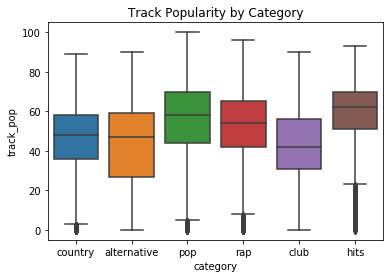

In [18]:
trackpop_bycategory = sns.boxplot(x='category', y="track_pop", data=df);
plt.title('Track Popularity by Category');

fig1 = trackpop_bycategory.get_figure()
fig1.savefig("../../Images_Plots/trackpop_bycategory.png")

The most popular is our 'hits' genre which makes sense and isn't really a hard-defined genre. The next one, is pop and then rap. Country and alternative are around the same which is intersting. The biggest range of track popularity is within the alternative genre.

## Audio Feature KDE Plots

In [19]:
df.columns

Index(['index', 'track_ids', 'track_pop', 'track_name', 'artist', 'artist_ids',
       'featured_artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_pop',
       'genre', 'category'],
      dtype='object')

In [20]:
ch = chartify.Chart(blank_labels=True, y_axis_type='density')
ch.set_title("KDE plot of Danceability")
ch.plot.kde(
    data_frame=df,
    values_column='danceability',
    color_column='category')
ch.axes.set_xaxis_label('Danceability Score')
ch.axes.set_yaxis_label('Count')
ch.show()

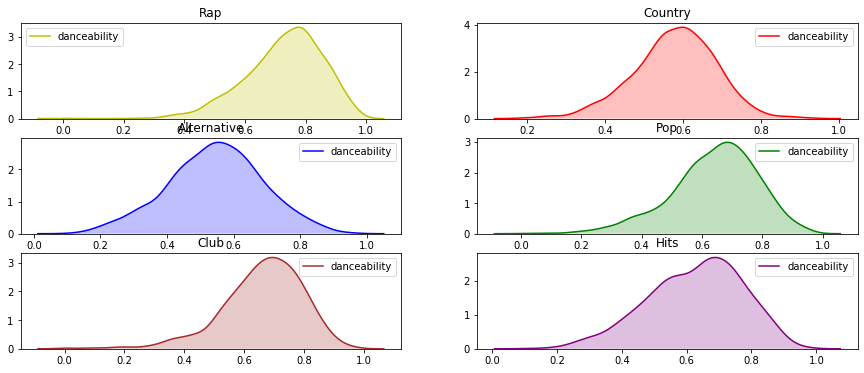

In [21]:
fig, axs = plt.subplots(figsize=(15,6),ncols=2, nrows =3)
chart2 = sns.kdeplot(df[df['category']=='alternative']['danceability'], shade=True, color="b", ax=axs[1,0]);
chart2.set_title('Alternative');
chart5 = sns.kdeplot(df[df['category']=='club']['danceability'], shade=True, color='brown', ax=axs[2,0]);
chart5.set_title('Club');
chart1 = sns.kdeplot(df[df['category']=='country']['danceability'], shade=True, color="r", ax=axs[0,1]);
chart1.set_title('Country');
chart6 = sns.kdeplot(df[df['category']=='hits']['danceability'], shade=True, color="purple", ax=axs[2,1]);
chart6.set_title('Hits');
chart3 = sns.kdeplot(df[df['category']=='pop']['danceability'], shade=True, color="g", ax=axs[1,1]);
chart3.set_title('Pop');
chart4 = sns.kdeplot(df[df['category']=='rap']['danceability'], shade=True, color="y", ax=axs[0,0]);
chart4.set_title('Rap');
fig.savefig('../../Images_Plots/KDE_danceability_ind.png')

In [22]:
ch = chartify.Chart(blank_labels=True, y_axis_type='density')
ch.set_title("KDE plot of Energy")
ch.plot.kde(
    data_frame=df,
    values_column='energy',
    color_column='category')
ch.axes.set_xaxis_label('Energy Score')
ch.axes.set_yaxis_label('Count')
ch.show()

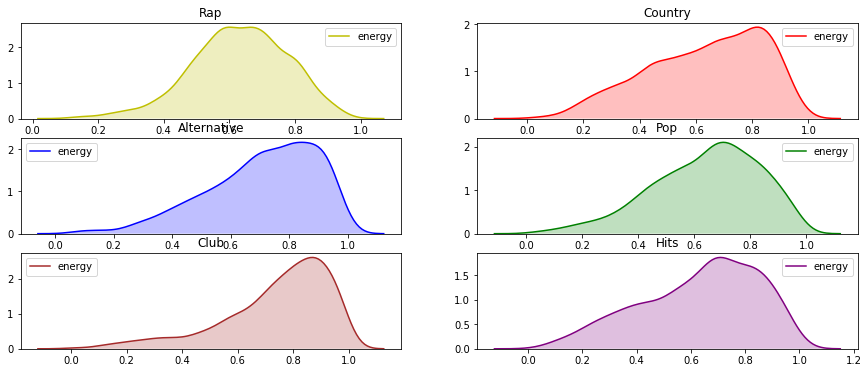

In [23]:
fig, axs = plt.subplots(figsize=(15,6),ncols=2, nrows =3)
chart2 = sns.kdeplot(df[df['category']=='alternative']['energy'], shade=True, color="b", ax=axs[1,0]);
chart2.set_title('Alternative');
chart5 = sns.kdeplot(df[df['category']=='club']['energy'], shade=True, color='brown', ax=axs[2,0]);
chart5.set_title('Club');
chart1 = sns.kdeplot(df[df['category']=='country']['energy'], shade=True, color="r", ax=axs[0,1]);
chart1.set_title('Country');
chart6 = sns.kdeplot(df[df['category']=='hits']['energy'], shade=True, color="purple", ax=axs[2,1]);
chart6.set_title('Hits');
chart3 = sns.kdeplot(df[df['category']=='pop']['energy'], shade=True, color="g", ax=axs[1,1]);
chart3.set_title('Pop');
chart4 = sns.kdeplot(df[df['category']=='rap']['energy'], shade=True, color="y", ax=axs[0,0]);
chart4.set_title('Rap');
fig.savefig('../../Images_Plots/KDE_energy_ind.png')

In [24]:
#want to look at this one further
ch = chartify.Chart(blank_labels=True, y_axis_type='density')
ch.set_title("KDE plot of Speechiness")
ch.plot.kde(
    data_frame=df,
    values_column='speechiness',
    color_column='category')
ch.axes.set_xaxis_label('Speechiness Score')
ch.axes.set_yaxis_label('Count')
ch.show()

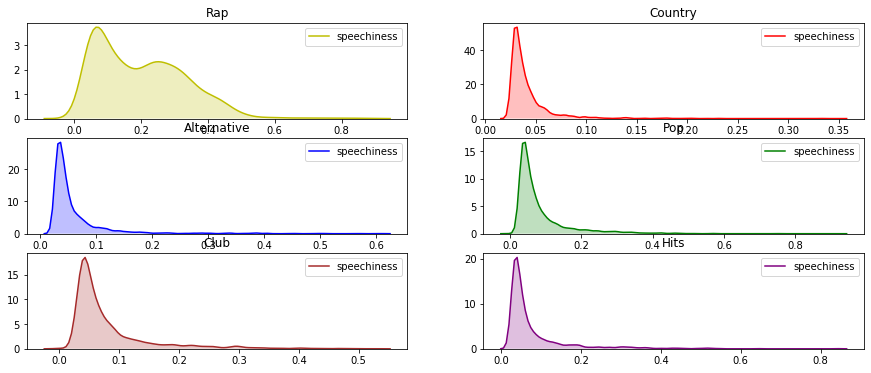

In [25]:
fig, axs = plt.subplots(figsize=(15,6),ncols=2, nrows =3)
chart2 = sns.kdeplot(df[df['category']=='alternative']['speechiness'], shade=True, color="b", ax=axs[1,0]);
chart2.set_title('Alternative');
chart5 = sns.kdeplot(df[df['category']=='club']['speechiness'], shade=True, color='brown', ax=axs[2,0]);
chart5.set_title('Club');
chart1 = sns.kdeplot(df[df['category']=='country']['speechiness'], shade=True, color="r", ax=axs[0,1]);
chart1.set_title('Country');
chart6 = sns.kdeplot(df[df['category']=='hits']['speechiness'], shade=True, color="purple", ax=axs[2,1]);
chart6.set_title('Hits');
chart3 = sns.kdeplot(df[df['category']=='pop']['speechiness'], shade=True, color="g", ax=axs[1,1]);
chart3.set_title('Pop');
chart4 = sns.kdeplot(df[df['category']=='rap']['speechiness'], shade=True, color="y", ax=axs[0,0]);
chart4.set_title('Rap');
fig.savefig('../../Images_Plots/KDE_speechiness_ind.png')

In [26]:
ch = chartify.Chart(blank_labels=True, y_axis_type='density')
ch.set_title("KDE plot of Instrumentalness")
ch.plot.kde(
    data_frame=df,
    values_column='instrumentalness',
    color_column='category')
ch.axes.set_xaxis_label('Instrumentalness Score')
ch.axes.set_yaxis_label('Count')
ch.show()

In [27]:
ch = chartify.Chart(blank_labels=True, y_axis_type='density')
ch.set_title("KDE plot of Time Signature")
ch.plot.kde(
    data_frame=df,
    values_column='time_signature',
    color_column='category')
ch.axes.set_xaxis_label('Time Signature')
ch.axes.set_yaxis_label('Count')
ch.show()

In [28]:
ch = chartify.Chart(blank_labels=True, y_axis_type='density')
ch.set_title("KDE plot of Acousticness")
ch.plot.kde(
    data_frame=df,
    values_column='acousticness',
    color_column='category')
ch.axes.set_xaxis_label('Acousticness Score')
ch.axes.set_yaxis_label('Count')
ch.show()

In [29]:
def subplot_distribution(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,20)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        #ax[i].set_xlabel(list_of_xlabels[i])

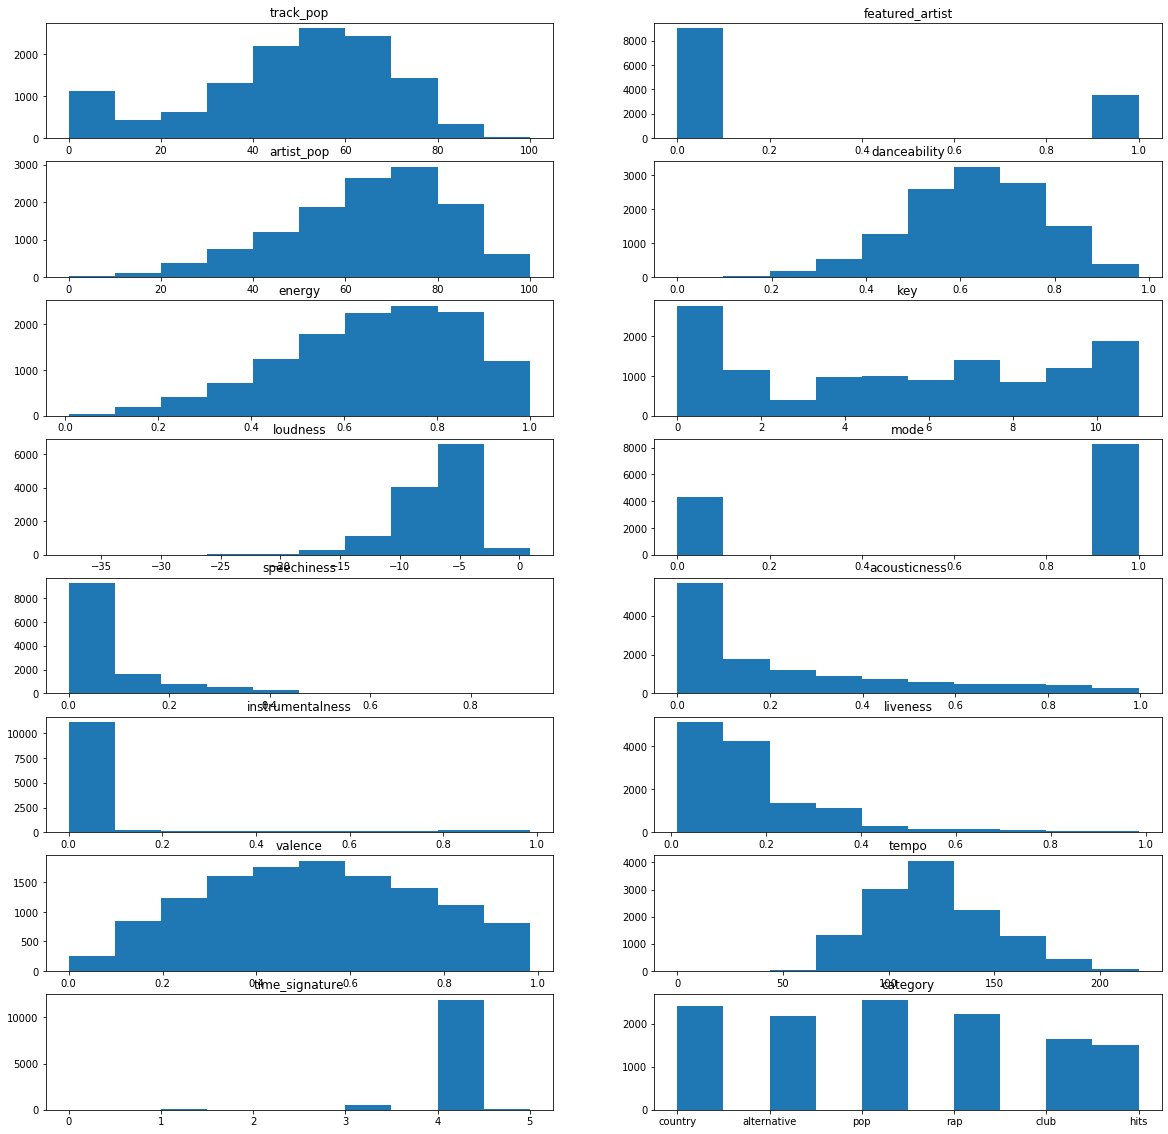

In [30]:
subplot_distribution(df, ['track_pop',
       'featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'category'], ['track_pop',
       'featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'category'], ['track_pop',
       'featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'category'])

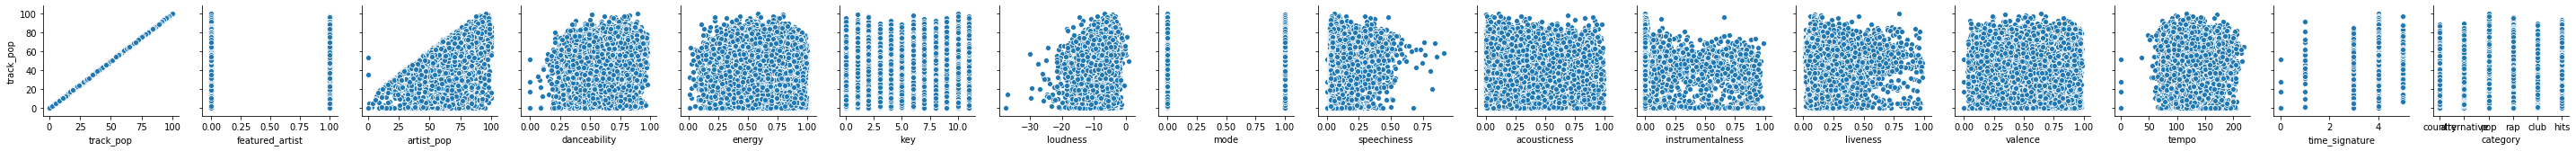

In [31]:
#artists with a dollar sign broke the code
sns.pairplot(df, x_vars= ['track_pop',
       'featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'category'], y_vars=['track_pop']);

The plots above seem like there's no trend in any of the variables. I'm going to subset into categories and maybe we can see more.

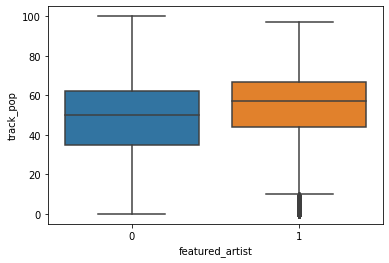

In [32]:
feat_art_df = sns.boxplot('featured_artist', 'track_pop', data = df);

fig2 = feat_art_df.get_figure()
fig2.savefig("../../Images_Plots/feat_art_df.png")

This plot shows that the mean popularity score of a track having a featured artist is higher than one without. This makes sense bc you are getting the main artists listeners as well as the featured artist. I would assume that more featured artists might lead to more song popularity.

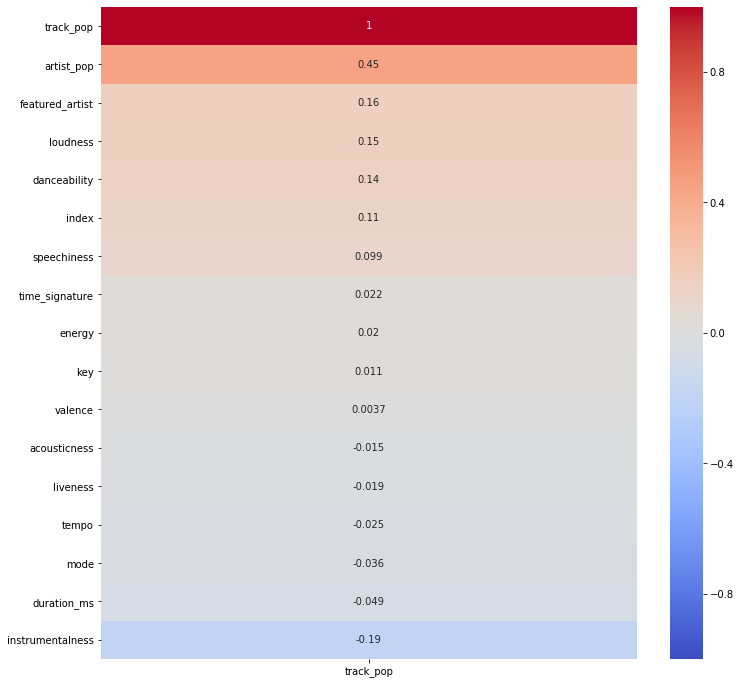

In [33]:
# Heatmap for all numerical variables against the track popularity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[['track_pop']].sort_values('track_pop'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

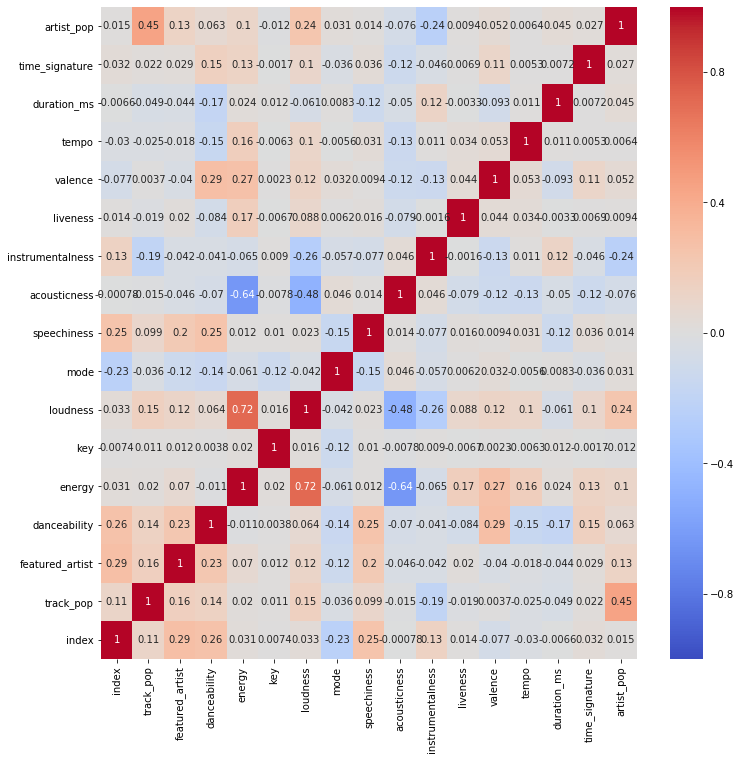

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

## Country

In [35]:
country = df[df['category'] == 'country']

In [ ]:
# Most popular song
display(country[country['track_pop']==89])
# Least popular song -- 111 songs
(country[country['track_pop']==0])

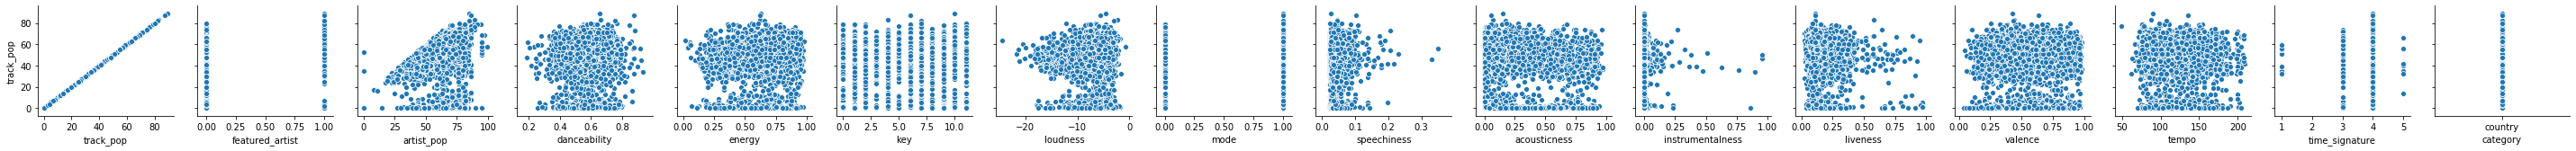

In [37]:
#artists with a dollar sign broke the code
sns.pairplot(country, x_vars= ['track_pop',
       'featured_artist', 'artist_pop', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'category'], y_vars=['track_pop']);

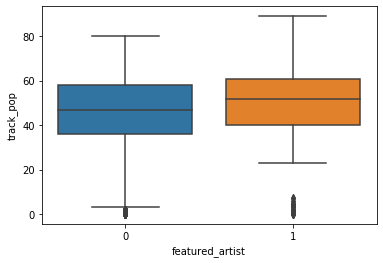

In [38]:
sns.boxplot('featured_artist', 'track_pop', data = country);

In [39]:
country.groupby('featured_artist')['track_pop'].mean()

featured_artist
0    43.108983
1    48.226244
Name: track_pop, dtype: float64

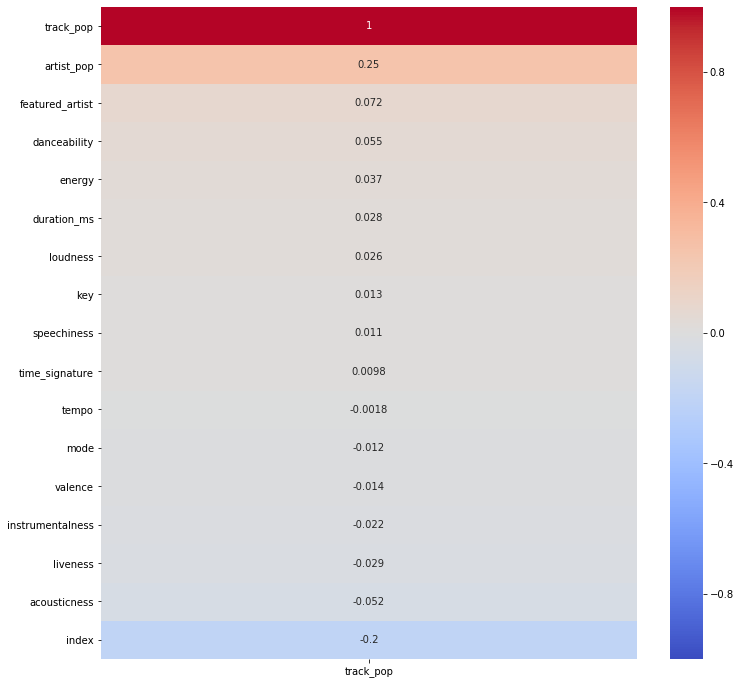

In [40]:
# Heatmap for all numerical variables against the track popularity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(country.corr()[['track_pop']].sort_values('track_pop'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

## Alternative

In [41]:
alternative = df[df['category'] == 'alternative']

In [42]:
# Most popular song
display(alternative[alternative['track_pop']==90])
# Least popular song -- 58 of them
display(alternative[alternative['track_pop']==0])


index               track_ids  track_pop track_name        artist  \
2765   3885  6U0FIYXCQ3TGrk4tFpLrEA         90      SUGAR  BROCKHAMPTON   

                  artist_ids  featured_artist  danceability  energy  key  ...  \
2765  1Bl6wpkWCQ4KVgnASpvzzA                0         0.453   0.538    1  ...   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
2765         0.449               0.0      0.19    0.516  122.973       204533   

      time_signature  artist_pop     genre     category  
2765               4          86  boy band  alternative  

[1 rows x 23 columns]

index               track_ids  track_pop  \
2884   4004  40qVMqLvEM1DsH4J2aOphi          0   
2921   4041  5R8tka2uRt4OmYAl7flifG          0   
2937   4057  29j1jT9jQHGdfZjLfDCBhM          0   
2953   4073  0hszFuidf0kTZy9kA8SJuN          0   
2954   4074  5Qk4fyP21ZCvqHIWXJ7yOl          0   
2966   4086  6g1mRpiKw9Ph9BSWba4tDP          0   
2969   4089  7oarANvlT46DjLlZUCBvQO          0   
3046   4166  5uUY26Ksquo91LaEfqALiR          0   
3276   4406  5AdLu2shYmDMqt2pHaOEle          0   
3287   4417  4F797Kz0zqZiMxNcRdO8R2          0   
3297   4434  6a8XNf0jP5S0t93zY82QVy          0   
3319   4460  1rQwPDfQ6oTYg1GHU839d4          0   
3328   4469  0S77yf9CO3aTcZnmdtqE7i          0   
3348   4490  5Y4TZqAsa8SGFejahmKaP6          0   
3353   4495  4QImqhRabCeYCgKRNTayZI          0   
3358   4500  32lRV853lcILakb4B5sFeJ          0   
3581   4744  0d9ulrjNixzL0rIHZP7jpw          0   
3854   5073  3jMQCMpQCL28fYmHdh4MeT          0   
4058   5341  4KnCdSCJi59Rf6JJybf07J          0   
4068   5352  7CqLYoS03lJ3M8lM6ElOzj          0   
4069   5353  5zIuC3TUBrJc3gW5fXw08p          0   
4071   5356  6e2bN9hFm0N6AXvoaT1P0I          0   
4072   5357  4neYxGVKepMq2ZzSjA5Vv4          0   
4073   5358  2qdRHMosT8YO3zfEJQXHsW          0   
4077   5364  4jmuG1KtFHgh2KyqTMiYbA          0   
4078   5366  5xzGFJKGEcdlbwKloFAKHz          0   
4079   5367  1mgOrB9q0nZW9mx6DlXAaC          0   
4084   5372  3OcCpMMDGoh9L5WNi67qqO          0   
4085   5373  0UCDSSVMVeVRx7ue4Ovgvi          0   
4086   5374  4AdSzZDnwyLGmNuJHHgmGY          0   
4096   5386  1IYgKFqW3gkJ1MxFi6KZcl          0   
4102   5392  7mgjHZUUKDHbzdZ9XB3xuM          0   
4104   5394  4Rp7gvGG1eL6T5GMymi0qW          0   
4107   5397  6KSWXoRSo8qJazIhIIlNkO          0   
4108   5398  5IeKoXLkGy5LSiKPCyUV9J          0   
4112   5402  0tKDsNARn5wzI1CDyEJRL8          0   
4114   5404  6L2r0E2qXHk279EjBIW9aQ          0   
4116   5406  7gILiy5AKnAL4KzyMSYTvh          0   
4118   5408  7CWTYPLoherd8ZwVVE8Y9K          0   
4121   5411  6o9H1yhTAF4FFC6Hzblj7E          0   
4126   5417  4GTCayuQFtvzjzyaWwaleT          0   
4128   5419  0yscVPvnheE550yepjydXC          0   
4130   5421  1IwkL0HhiI9y2cyKDXG0sL          0   
4133   5424  4Jvzk9wvrSZu3m7VemcntM          0   
4134   5425  351vJCRA4X7bWJ3rApfwyG          0   
4143   5435  7HuAVTtzubdCgGkQCIE1Ke          0   
4144   5436  3lK1d2P6LBsSz4bL4c1dJr          0   
4248   5546  54rWiGuMfNyIh0zNd7OVfq          0   
4264   5562  3CWldj4vhoQTPivgR9hGFx          0   
4276   5574  029amV20qm9Em5qQBRHXQ4          0   
4279   5577  5NCOy6eqCvxo0v2vfZsR5q          0   
4286   5584  18abVvEpmRPLo0rwT2ieZ8          0   
4462   5794  5hTRvaiv0WINSdZhZHwgLL          0   
4465   5799  7L9IGgZekAzMtRSnx25jSj          0   
4478   5812  1HZRchuDeRyoXDXL8LAuhU          0   
4484   5818  6TaN5YAbmwhEngg8tTBokx          0   
4488   5823  73B6QmyhY8gzdnx6EX2iUG          0   
4499   5835  7ExNcWbiTDtGIYw3lF0qho          0   

                                   track_name  \
2884                              Bury Me Low   
2921                                     Numb   
2937                                     Move   
2953                                    Wrong   
2954                                  Content   
2966                         We've Had Enough   
2969                      Set Phasers To Stun   
3046                             If It's Love   
3276  Outdoor Miner - 2006 Remastered Version   
3287                                   My Sex   
3297                    Everything Is Alright   
3319                           American Candy   
3328                           Goodnight Moon   
3348                        Forever My Father   
3353                            Thunderhearts   
3358                                   Always   
3581                        My True Endeavour   
3854                   A Favor House Atlantic   
4058                        Lightning Crashes   
4068                               Far Behind   
4069                      

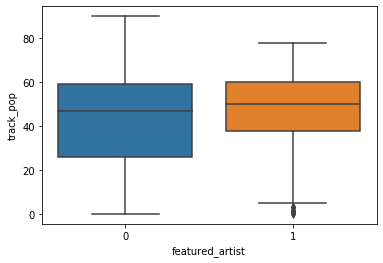

In [43]:
sns.boxplot('featured_artist', 'track_pop', data = alternative);

In [44]:
alternative.groupby('featured_artist')['track_pop'].mean()

featured_artist
0    42.012720
1    45.605839
Name: track_pop, dtype: float64

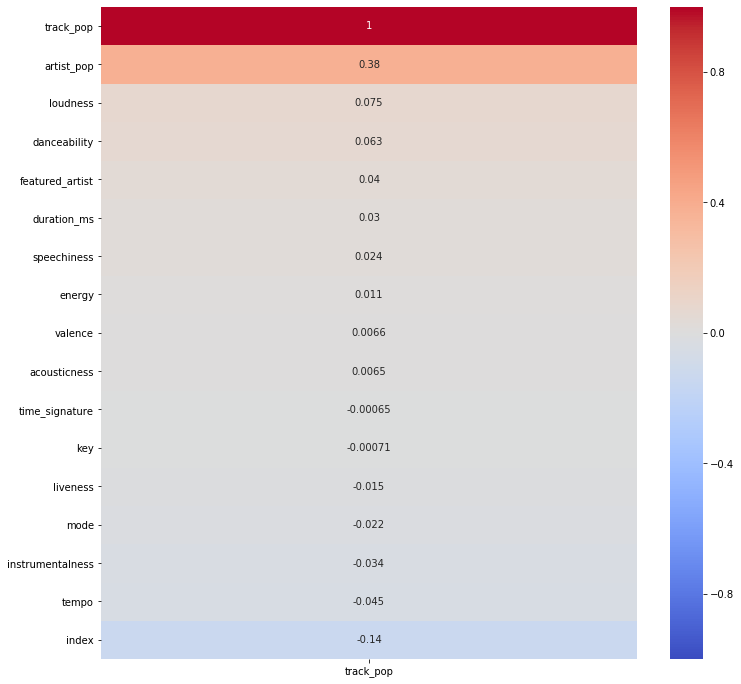

In [45]:
# Heatmap for all numerical variables against the track popularity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(alternative.corr()[['track_pop']].sort_values('track_pop'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

## Pop

In [46]:
pop = df[df['category'] == 'pop']

In [47]:
# Most popular song
display(pop[pop['track_pop']==100])
# Least popular song -- 16 of them
display(pop[pop['track_pop']==0])

index               track_ids  track_pop track_name       artist  \
5820   7270  0nbXyq5TXYPCO7pr3N8S4I        100    The Box  Roddy Ricch   

                  artist_ids  featured_artist  danceability  energy  key  ...  \
5820  757aE44tKEUQEqRuT6GnEB                0         0.896   0.586   10  ...   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
5820         0.104               0.0      0.79    0.642  116.971       196653   

      time_signature  artist_pop        genre  category  
5820               4          96  melodic rap       pop  

[1 rows x 23 columns]

index               track_ids  track_pop                  track_name  \
5195   6565  3ytzJUm67FgYBtYQrMUuwk          0                    Addicted   
5484   6881  4UmXzLXO9298F8UdR4Ndmn          0               Computer Love   
5499   6896  7ICe7aEcO7GaVGWwUc0edv          0            Don't Wanna Know   
5509   6906  0z6IhW6xsWonAQ1C09Df91          0                Pyramid Song   
5510   6907  4mfzUScqJrZuzL9EvP1jTE          0                       Hello   
5531   6928  5894p5IgpAcwV37r92cYqn          0           Enjoy The Silence   
5766   7197  31GAiER3PSF6rcpEAxjM54          0    Better Than I Used To Be   
6680   8333  3GEKL7aB9ekszM7VhzgiBl          0                 Suç Mahalli   
6719   8372  3xHhymKOWibjRTJ5QPRW9k          0             İçim Paramparça   
6811   8511  3cFG2erCQQVAejCoDiRncV          0                    Untitled   
6818   8518  4rcBgGdnnplqvHgjKMk1gL          0                      Garden   
7122   8876  2Ko6RUAN0VnDDElpF9pbmJ          0              Malas Noticias   
7124   8878  0VVmXvMCY8XcmYc6JMjhVf          0             A la Misma Hora   
7127   8881  6Gb0oHws0G3ydL8kg3Zi2A          0                  Una Locura   
7133   8887  3Z3iJvPCqlLvRsQuSKb1cU          0                  Ay Mi Dios   
7329   9191  4RVtBlHFKj51Ipvpfv5ER4          0  Drown (feat. Clinton Kane)   

                   artist              artist_ids  featured_artist  \
5195  River Becomes Ocean  6xLpAXwI7XGsRgroyZCY3L                0   
5484    Balanescu Quartet  39nJA4NmdZE5sJecB0zjXY                0   
5499   Costantino Carrara  7eVJh60tcshbgbm26TWISX                0   
5509      Jonny Greenwood  0z9s3P5vCzKcUBSxgBDyLU                1   
5510          Lucky Chops  2b6gc4EVpO6OTlDvKrK852                0   
5531          Martin Gore  6KQQ6ka4Thwww3kjYqrG0F                1   
5766          Mat Kearney  2NQEwAVHBNcI0tGMLlWwF1                1   
6680       Kahraman Deniz  3nF0yXDatdq9xV279nEs5X                0   
6719          Halil Sezai  0Aoou2kIWXrzTOfhFzmNqa                0   
6811    Rex Orange County  7pbDxGE6nQSZVfiFdq9lOL                0   
6818                Grady  6FmiNnTXQJTmOMAx4kB38R                1   
7122      Miguel Campello  0OzDyhPnwvUVGRNWrVILlg                0   
7124              Nolasco  1iydw0OqyICpB5XlyfZ7qP                1   
7127           Lin Cortés  3SBsCnbQ5q8bOW0uBcwG54                0   
7133      Roberts Polanco  2hCeJ1mwW5bE5anuDvAgyi                0   
7329        Martin Garrix  60d24wfXkVzDSfLS6hyCjZ                1   

      danceability  energy  key  ...  acousticness  instrumentalness  \
5195        0.5580   0.967    1  ...       0.00495          0.000256   
5484        0.5420   0.218    5  ...       0.91200          0.926000   
5499        0.4630   0.527    7  ...       0.73400          0.764000   
5509        0.1820   0.162   11  ...       0.98300          0.903000   
5510        0.3250   0.406    5  ...       0.03770          0.118000   
5531        0.0887   0.104    7  ...       0.98700          0.740000   
5766        0.7500   0.648    9  ...       0.05900          0.000234   
6680        0.2560   0.615    1  ...       0.14300          0.000050   
6719        0.2090   0.378    2  ...       0.75300          0.000014   
6811        0.5730   0.200    9  ...       0.90600          0.000000   
6818        0.7290   0.576    8  ...       0.12400          0.000000   
7122        0.7330   0.904    0  ...       0.52700          0.000065   
7124        0.5630   0.235    2  ...       0.84500          0.000002   
7127        0.6700   0.812   11  ...       0.63600          0.000000   
7133        0.6850   0.537    0  ...       0.30700          0.000000   
7329        0.5730   0.739    9  ...       0.21200          0.000000   

      liveness  valence    tempo  duration_ms  time_signature  artist_pop  \
5195    0.1220   0.2230   89.924       234000               4          40   
5484    0.1740   0.5600  123.812       380160               4          39   
5499    0.2260   0.3180  100.040

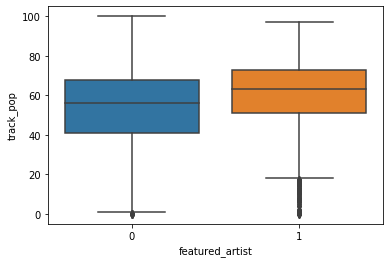

In [48]:
sns.boxplot('featured_artist', 'track_pop', data = pop);

In [49]:
pop.groupby('featured_artist')['track_pop'].mean()

featured_artist
0    52.614620
1    59.087925
Name: track_pop, dtype: float64

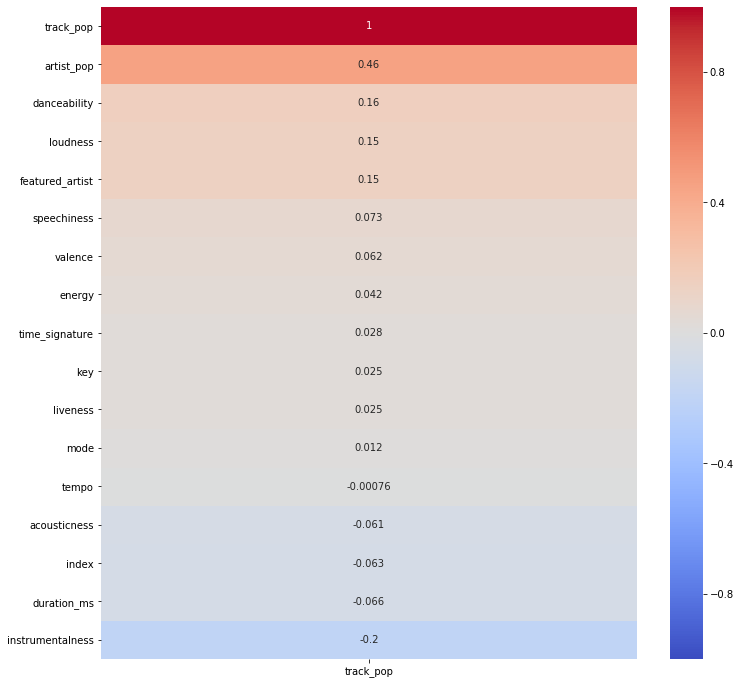

In [50]:
# Heatmap for all numerical variables against the track popularity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(pop.corr()[['track_pop']].sort_values('track_pop'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

## Rap

In [51]:
rap = df[df['category'] == 'rap']

In [52]:
# Most popular song
display(rap[rap['track_pop']==96])
# Least popular song -- 38 of them
display(rap[rap['track_pop']==0])

index               track_ids  track_pop                  track_name  \
7403   9317  5yY9lUy8nbvjM1Uyo1Uqoc         96  Life Is Good (feat. Drake)   

      artist              artist_ids  featured_artist  danceability  energy  \
7403  Future  1RyvyyTE3xzB2ZywiAwp0i                1         0.676   0.609   

      key  ...  acousticness  instrumentalness  liveness  valence    tempo  \
7403    2  ...        0.0706               0.0     0.152    0.508  142.037   

      duration_ms  time_signature  artist_pop        genre  category  
7403       237735               4          94  atl hip hop       rap  

[1 rows x 23 columns]

index               track_ids  track_pop  \
7571   9523  5ynlErQ5R9saBcxtL4lv5P          0   
7572   9524  4Qnswwpp5C8UrFlHObOGVf          0   
7573   9525  0i3NAlDR0q7XvKewYu32kU          0   
7574   9526  1JPpZPrRaxnrVvfsMwNlQH          0   
7575   9527  7JWfzFLHGFd6iO6tikSehG          0   
7576   9528  67knRf2ZDJRuGnrQZ90HtQ          0   
7577   9529  1jESFajdOz8hZ4dlJuFGeR          0   
7578   9530  7gCv1CF8UiqcGI4gATAXdO          0   
7579   9531  0Zjyvv1i6139y0d8L1FE8u          0   
7580   9532  42dTai9LruyY8HBMMjFhi5          0   
7581   9533  2mRlZW8jVg1TItYBvLnwnw          0   
7582   9534  2B7xGLQ7YNNpptonkC9uIs          0   
7583   9535  0AoLBS2mpSzLBWu3ihILQa          0   
7725   9712  3Cm3UCKratY9kdy5mcarIQ          0   
7802   9810  75UVL3jWBpxqysCUEDtLfa          0   
7882   9899  7l4w1JPI5G3KQi5DRxkZdP          0   
7887   9904  2Niis1I02mgeyGXse9WDsO          0   
7905   9922  6hBYwoTDLZeDSPc6mjVc77          0   
7908   9925  5sFKvXB1m6U3sTkTYHKdas          0   
7912   9929  3i8dnQYaI9fTpVGENmWCsP          0   
7915   9932  3XWA4R39gRVYrjxrZ14V3c          0   
7917   9934  6E3Xw63ye360mA2h6Lto95          0   
7920   9937  4TnBpipubhI0zlhDN5soNu          0   
7993  10011  79F94Qh0YxlCsQx7mBITxf          0   
8150  10214  1BnP3j4H1q8hPNOPJPCVtX          0   
8514  10604  6TReOqBCB7e6lL0mZMLCLk          0   
8519  10609  2fNupdSCsIvaSWBizSm0B0          0   
9055  11192  6WL1c6ELvm4V4p89mUdrlM          0   
9188  11371  3fspXiBcl469Rw6WBr4uw9          0   
9193  11376  2WxQUScpl1Jg9I67HYZd5O          0   
9228  11415  5yT1nlN72ljC4FPx6HK5bU          0   
9236  11424  11Txm6v3p3x6GKqQ6nMesf          0   
9352  11578  5FZ4uscB4isUvQAEGtWjBg          0   
9406  11633  7cj7vEylXFN6Lfjj183A3f          0   
9416  11643  6vKXDgJmquMzFSVBCH55Nc          0   
9426  11653  2gOYY2glUc6XMTnzBG59I4          0   
9591  11854  4xrIWVwDYmJ5KFXinj82TG          0   
9594  11857  7FXXVMGfMLy1IkmgDIZJBp          0   

                                    track_name            artist  \
7571                                   Say Hoe          Pasquale   
7572                       The Weeknd Down Low     DJ Triple Exe   
7573                             In the Clouds       Johnny Rain   
7574                           Welcome to Love       Johnny Rain   
7575             Love Me Crazy (feat. Kehlani)           Samaria   
7576                    Bloodshot - SRNO Remix     Lexy Panterra   
7577             L.I.S.A. (Love.Is.So.Amazing)         Lamar Jay   
7578                 2 Girls (feat. Jowynalex)        Trey Songz   
7579                                    G-Code         Dotty Dot   
7580  Bryson Tilla Ft. King Vory - Break Bread     Dj Hard Hitta   
7581        Perkys Calling - Screwed & Chopped       DJ Molasses   
7582           After Party (feat. Waka Flocka)   Rich Homie Quan   
7583                             Drunk in Love                XO   
7725           Fast (feat. Offset) - Y2K Remix   Sueco the Child   
7802                                    Mormon           Brewski   
7882             Gehen wir rein - Instrumental           Bushido   
7887                     CCNDNA - Instrumental           Bushido   
7905                     Flizzy - Instrumental              Fler   
7908                                Astroworld          Minthaze   
7912               Black Friday - Instrumental           Bushido   
7915                       Papa - Instrumental           Bushido   
7917                    Fallout - Instrumental           Bushido   
7920       Still D.R.E. - Instrumental Version           Dr. Dre   
7993                                  I Luv It             Jeezy   
8150                                       Ass            boneIV   
8514                                Jurei/Odin      Fabio Brazza   
8519              Envolvidão - Versão Acústica              Rael   
9055                                    Moryak             Feduk   
9188                                  El Juego           Emanero   
9193           

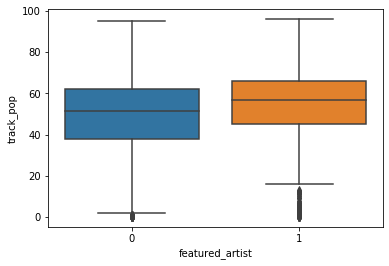

In [53]:
sns.boxplot('featured_artist', 'track_pop', data = rap);

In [54]:
rap.groupby('featured_artist')['track_pop'].mean()

featured_artist
0    49.201014
1    54.150962
Name: track_pop, dtype: float64

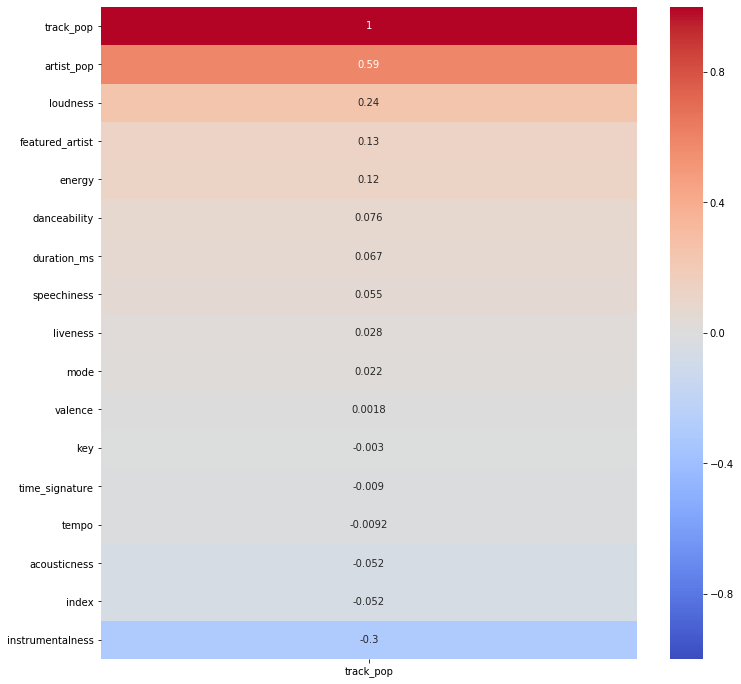

In [55]:
# Heatmap for all numerical variables against the track popularity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(rap.corr()[['track_pop']].sort_values('track_pop'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

Plotting every audio feature against categories

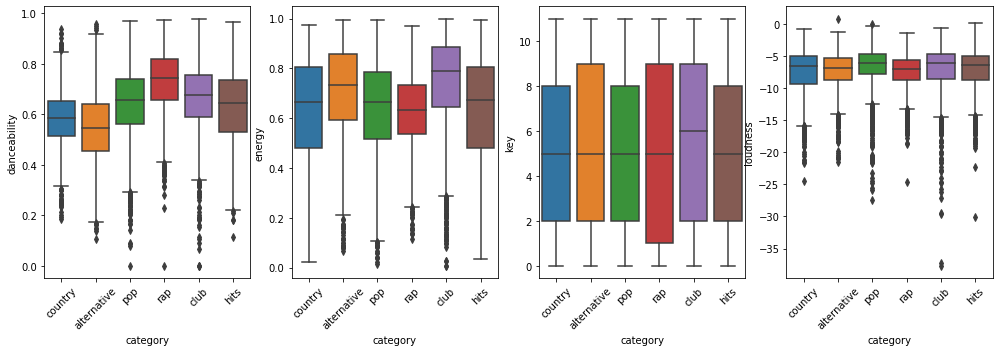

In [56]:
fig, axs = plt.subplots(figsize=(17,5),ncols=4)
chart = sns.boxplot(x='category', y='danceability', data=df, ax=axs[0]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);
chart2 = sns.boxplot(x='category', y='energy', data=df, ax=axs[1]);
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45);
chart3 = sns.boxplot(x='category',y='key', data=df, ax=axs[2]);
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45);
chart4 = sns.boxplot(x='category',y='loudness', data=df, ax=axs[3]);
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=45);

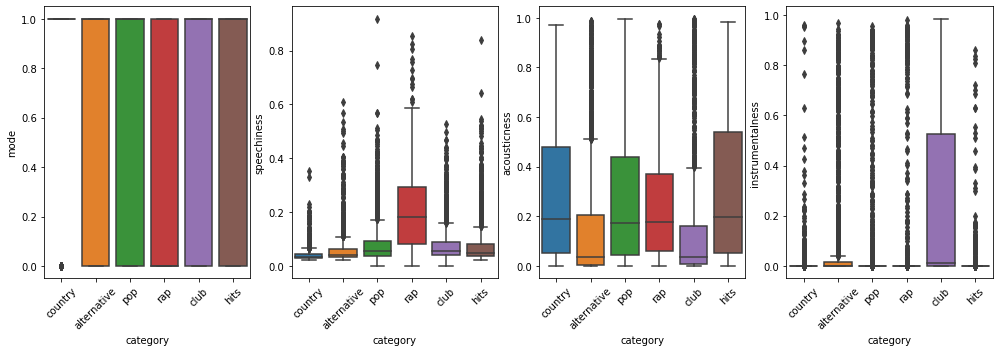

In [57]:
fig, axs = plt.subplots(figsize=(17,5),ncols=4)
chart = sns.boxplot(x='category', y='mode', data=df, ax=axs[0]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);
chart2 = sns.boxplot(x='category', y='speechiness', data=df, ax=axs[1]);
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45);
chart3 = sns.boxplot(x='category',y='acousticness', data=df, ax=axs[2]);
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45);
chart4 = sns.boxplot(x='category',y='instrumentalness', data=df, ax=axs[3]);
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=45);

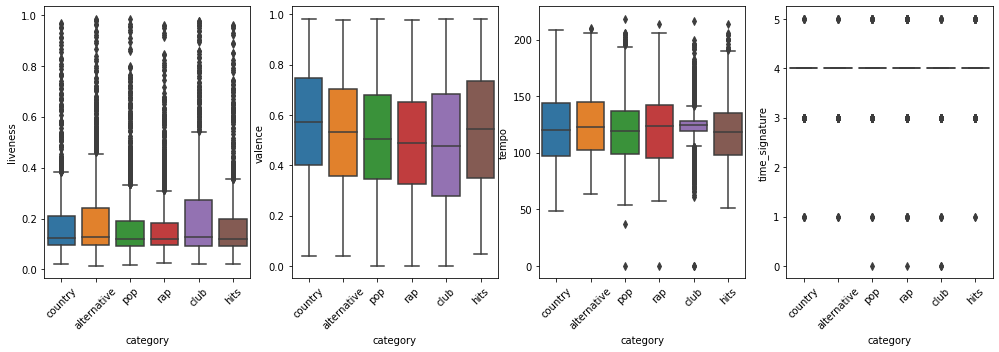

In [58]:
fig, axs = plt.subplots(figsize=(17,5),ncols=4)
chart = sns.boxplot(x='category', y='liveness', data=df, ax=axs[0]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);
chart2 = sns.boxplot(x='category', y='valence', data=df, ax=axs[1]);
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45);
chart3 = sns.boxplot(x='category',y='tempo', data=df, ax=axs[2]);
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45);
chart4 = sns.boxplot(x='category',y='time_signature', data=df, ax=axs[3]);
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=45);

## Club

In [59]:
club = df[df['category']=='club']

In [60]:
# Most popular song
display(club[club['track_pop']==90])
# Least popular song -- 41 of them
display(club[club['track_pop']==0])

index               track_ids  track_pop track_name    artist  \
10796  13146  2ksOAxtIxY8yElEWw8RhgK         90      China  Anuel AA   

                   artist_ids  featured_artist  danceability  energy  key  \
10796  2R21vXR83lH98kGeO99Y66                1         0.786   0.808    7   

       ...  acousticness  instrumentalness  liveness  valence    tempo  \
10796  ...        0.0846          0.000289    0.0822    0.609  105.027   

       duration_ms  time_signature  artist_pop  genre  category  
10796       301714               4          96  latin      club  

[1 rows x 23 columns]

index               track_ids  track_pop  \
9665   11928  24ob5sfH5z9bSLAb9TxCtb          0   
9710   11973  5McVX0UznX6nMKXSGWhyMe          0   
9800   12063  6tjyCXDNgyS9TNQzrWZZsb          0   
9819   12084  2ZDxqzTREwijxYQlG2FClP          0   
9908   12178  7t9ab63VhjpohZShzLW3DE          0   
9913   12183  75xR1PROCsxK2GAoNEMTZ9          0   
9921   12191  5O7efsYLMs1BodKtt06enV          0   
9924   12194  4fCTGgPZKeiaClKP6trQkk          0   
9927   12197  64h2cfBCLFmlh9X8TDg3Yz          0   
9929   12199  5aPV363fA4ZvHU74QOzoCc          0   
9931   12201  7MqJUFgnY84WhyBpP0IiEA          0   
9932   12202  4M5IuH76Wy0rvZhnpEnznr          0   
9935   12205  2bAMdldjZAheXFlSDwCs60          0   
9940   12210  2VYASoKrBcyFVXFytWi6he          0   
9942   12212  3HwikkC4vs5h6CYT1aJwlb          0   
9953   12223  0TzN00EH5mi3PpUMhR58Me          0   
9955   12225  4pQuZfTadfQZ5Q3sfmX46H          0   
9968   12238  2kVZI1H6owF0yX8OXuJXMr          0   
9972   12242  3OAVS0lj4f1WNo3r7ncvNO          0   
9981   12251  1NdqmjE5vt5qgi10QRPljo          0   
9992   12262  1IS7iy0OkW90rsndt0uhIC          0   
10333  12648  7n0cOjwadpms08yfGEeyOQ          0   
10334  12649  37HlzGegDV2cIhd6e85meg          0   
10380  12695  4VNbjRqBMv7Km87nVtQCcF          0   
10381  12696  5hLLQxvh61WD7JFOnvMjfD          0   
10514  12849  6K4hIhrYgKsjPklk304FGd          0   
10529  12864  5JuL0sL5Vlm5AwPhHQDdp3          0   
10533  12868  0g0cfV3zPInt1kQ3p7KGDk          0   
10789  13138  7rczJE6Hdjvg1lk6eXfWHo          0   
10848  13199  3wc3Pa7ko9hvYjtzPpSe6q          0   
10875  13226  6Z6c5RLe7eGla3PrO3ooph          0   
10883  13234  00bF3GUPRGPUbtjehC6acA          0   
10885  13236  2XX4A9u3CNmpqHI2n4Udgd          0   
10893  13244  4BMmA05SudHkXy2ZYimxMM          0   
10898  13249  7B0BghNmHDx52TvzLRa3E6          0   
10902  13253  4x6kLSbZF1bD2zu2txVr3S          0   
10903  13254  5YQrbqgiFOYDQLQqnPpF8G          0   
11267  13704  3kn8eIbGPfwlYsg0m6JyZ1          0   
11339  13783  3TuJ2CWoFuCjcLwuxBn3GU          0   
11346  13790  1G3nmgbRt1rzAIqIDCi05Y          0   
11367  13811  6QelMc5cL0qgZSvvrwdyPP          0   

                                              track_name  \
9665                                          The Answer   
9710                                       Keeps Me High   
9800                               Gareth; minty as heck   
9819                                     Gareth on @mint   
9908                           MR. G - Every Single Time   
9913                             Whiplash - Original Mix   
9921                                                  Go   
9924                 Drifter (DJ Luke Remix) [feat. Dyu]   
9927         Alone - HardStyle Remix (feat. Alan Walker)   
9929                                                Fire   
9931                                           My Gabber   
9932                                       Crowd Control   
9935        Flying High (Dcx Bass Boosted Hardstyle Mix)   
9940                     We Like To Party - Original Mix   
9942                                             Zig Zag   
9953                       Jungle Jokes - Tomy Jay Remix   
9955                                      Arcade Mammoth   
9968                                            Blackout   
9972                                     Pump Up The Jam   
9981                       Never Look Back - Yikes Remix   
9992             Never Look Back (DAMIAN R SANTOS Remix)   
10333                        Hanging Tree - Original Mix   
10334                         Let's Get Ill - Radio Edit   
10380                                              Maria   
10381                                     Creedence Song   
10514                                              Dance   
10529  Cruising (Steve Murano Mix) [Nalin & Kane Vs. ...   
10533                   Yeah Yeah - D Ramirez Radio Edit   
10789                                               Mine   
10848                  Put Your Body In It - 12" Version   
1087

## Hits

In [61]:
hits = df[df['category']=='hits']

In [62]:
# Most popular song
display(hits[hits['track_pop']==93])
# Least popular song -- 6 of them
display(hits[hits['track_pop']==0])

index               track_ids  track_pop         track_name  \
11470  13924  7qEHsqek33rTcFNT9PFqLf         93  Someone You Loved   

              artist              artist_ids  featured_artist  danceability  \
11470  Lewis Capaldi  4GNC7GD6oZMSxPGyXy4MNB                0         0.501   

       energy  key  ...  acousticness  instrumentalness  liveness  valence  \
11470   0.405    1  ...         0.751               0.0     0.105    0.446   

         tempo  duration_ms  time_signature  artist_pop  genre  category  
11470  109.891       182161               4          92    pop      hits  

[1 rows x 23 columns]

index               track_ids  track_pop             track_name  \
12051  14547  4nZN50JWs7JTQxbW3PXNKV          0  More Than Good Enough   
12065  14561  2m861H8brzg2aMGBwH3LJ0          0           Not The Same   
12764  15296  5edd2m7DvEglQqwUd1LmQd          0            Reboladinha   
13021  15725  6ZO84z5SOlu7nCL7UONjOC          0                  Yalan   
13284  16116  3PP3wvqF7TqSBuM1JYVWCC          0         Celengan Rindu   
13313  16148  23V8GLR7IHBzc4ipiT5Zl2          0              Cukup Tau   

                      artist              artist_ids  featured_artist  \
12051            Joel Vaughn  0LAqQNqZSCpMUXRgONL5iB                0   
12065  North Point InsideOut  4EOKpEhAFc9ISyMJHZlQYm                1   
12764              MC Lukkas  1hfkB6NMeEj6pTSEpuiHra                1   
13021           Aleyna Tilki  4ckLjJztj53Ifid7WHweBn                0   
13284          Fiersa Besari  06QVnTCdjs4jPKO0487EGV                0   
13313           Rizky Febian  28DdkLhrzQNizZ0ExQpyku                0   

       danceability  energy  key  ...  acousticness  instrumentalness  \
12051         0.503   0.879    1  ...       0.06210          0.000000   
12065         0.708   0.809   11  ...       0.00889          0.000008   
12764         0.722   0.691    7  ...       0.21500          0.000000   
13021         0.455   0.779    2  ...       0.00576          0.000018   
13284         0.636   0.536    9  ...       0.10500          0.000000   
13313         0.653   0.229    9  ...       0.76500          0.000000   

       liveness  valence    tempo  duration_ms  time_signature  artist_pop  \
12051    0.2410   0.4210  174.001       223688               4          43   
12065    0.0754   0.8470  119.956       199000               4          15   
12764    0.0959   0.5730  160.080       140885               4          56   
13021    0.1010   0.0672  149.941       212149               4          56   
13284    0.1350   0.6610  116.878       224280               4          74   
13313    0.1080   0.5190  168.076       205621               4          67   

                  genre  category  
12051    anthem worship      hits  
12065    anthem worship      hits  
12764      funk carioca      hits  
13021       turkish pop      hits  
13284  indonesian indie      hits  
13313    indonesian pop      hits  

[6 rows x 23 columns]

## Looking at Overlap Dataframe

In [63]:
df = pd.read_csv('../../Data/overlap.csv')
df.head()

track_ids  track_pop                track_name         artist  \
0  03fT3OHB9KyMtGMt2zwqCT         73             Play It Again     Luke Bryan   
1  7mldq42yDuxiUNn08nvzHO         77     Body Like A Back Road       Sam Hunt   
2  05ZACkzW8YbRq3eFgIfSNB         71               Springsteen    Eric Church   
3  5S5rw0WLVCAux5B5bWCehK         68  I Like The Sound Of That  Rascal Flatts   
4  1Wjk9qHVbxgOopOEP9SqLW          7         Sleep Without You    Brett Young   

               artist_ids  featured_artist  danceability  energy  key  \
0  0BvkDsjIUla7X0k6CSWh1I                0         0.506   0.886   11   
1  2kucQ9jQwuD8jWdtR9Ef38                0         0.732   0.458    5   
2  2IvkS5MXK0vPGnwyJsrEyV                0         0.692   0.809    2   
3  0a1gHP0HAqALbEyxaD5Ngn                0         0.611   0.800    0   
4  0fiWOxhsBsQQvFDtxUQWo0                0         0.631   0.716   10   

   loudness  ...  acousticness  instrumentalness  liveness  valence    tempo  \
0    -3.225  ...        0.0916          0.000000    0.0734    0.595  143.935   
1    -7.225  ...        0.4470          0.000000    0.1360    0.661   98.938   
2    -5.935  ...        0.1000          0.000098    0.1850    0.927  104.023   
3    -5.610  ...        0.2570          0.000000    0.1940    0.527   89.974   
4    -5.713  ...        0.0130          0.000000    0.0756    0.647   88.541   

   duration_ms  time_signature  artist_pop                 genre  category  
0       226867               4          81  contemporary country   country  
1       165387               4          78  contemporary country   country  
2       263387               4          77  contemporary country   country  
3       209280               4          76  contemporary country   country  
4       187813               4          76  contemporary country   country  

[5 rows x 22 columns]

In [64]:
df.mean()

track_pop               58.333333
featured_artist          0.187500
danceability             0.622375
energy                   0.727808
key                      5.900000
loudness                -5.559504
mode                     0.733333
speechiness              0.074320
acousticness             0.166076
instrumentalness         0.018299
liveness                 0.171847
valence                  0.591949
tempo                  124.596183
duration_ms         202573.345833
time_signature           3.979167
artist_pop              74.562500
dtype: float64